<a href="https://colab.research.google.com/github/yayie77/Concepts-and-Technologies-of-AI/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Task

In [4]:

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI /bank.csv")

Statistics for age:
  Mean: 41.23
  Median: 39.00
  Std Dev: 11.91
  Min: 18
  Max: 95

Statistics for balance:
  Mean: 1528.54
  Median: 550.00
  Std Dev: 3225.27
  Min: -6847
  Max: 81204

Statistics for duration:
  Mean: 371.99
  Median: 255.00
  Std Dev: 347.11
  Min: 2
  Max: 3881

Statistics for campaign:
  Mean: 2.51
  Median: 2.00
  Std Dev: 2.72
  Min: 1
  Max: 63

Statistics for pdays:
  Mean: 51.33
  Median: -1.00
  Std Dev: 108.75
  Min: -1
  Max: 854

Statistics for previous:
  Mean: 0.83
  Median: 0.00
  Std Dev: 2.29
  Min: 0
  Max: 58



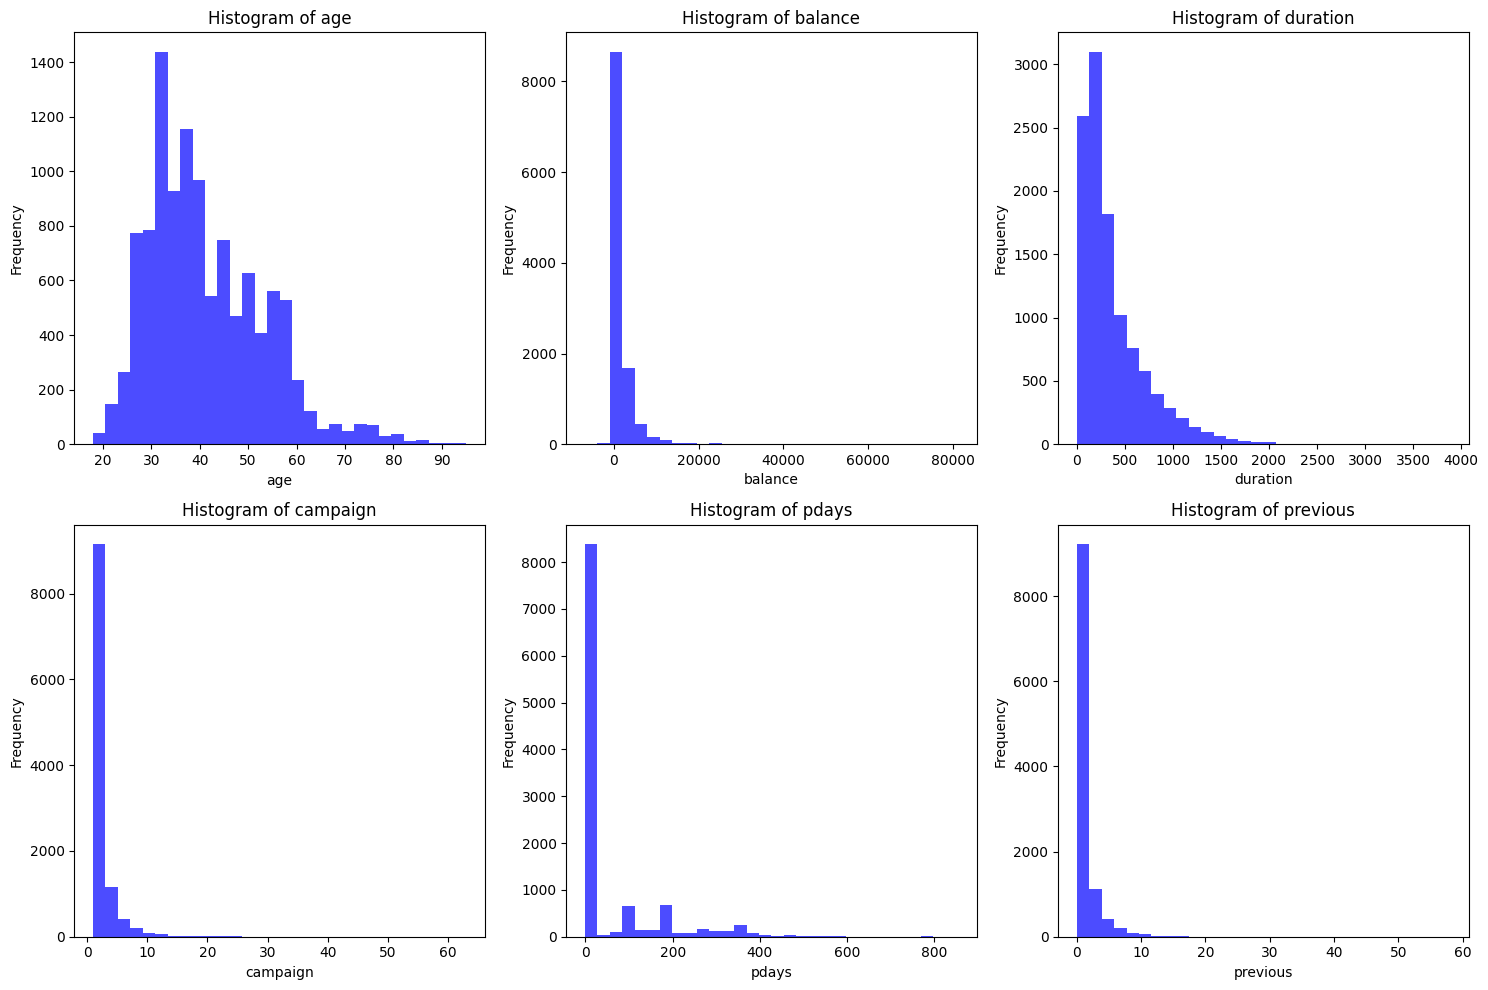


Correlation Matrix:
[[ 1.00000000e+00  1.12299889e-01  1.89228074e-04 -5.27793616e-03
   2.77383431e-03  2.01685612e-02]
 [ 1.12299889e-01  1.00000000e+00  2.24361313e-02 -1.38938225e-02
   1.74111486e-02  3.08052469e-02]
 [ 1.89228074e-04  2.24361313e-02  1.00000000e+00 -4.15574588e-02
  -2.73915532e-02 -2.67161713e-02]
 [-5.27793616e-03 -1.38938225e-02 -4.15574588e-02  1.00000000e+00
  -1.02726048e-01 -4.96994980e-02]
 [ 2.77383431e-03  1.74111486e-02 -2.73915532e-02 -1.02726048e-01
   1.00000000e+00  5.07271588e-01]
 [ 2.01685612e-02  3.08052469e-02 -2.67161713e-02 -4.96994980e-02
   5.07271588e-01  1.00000000e+00]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load data using NumPy
data = np.genfromtxt("/content/drive/MyDrive/AI /bank.csv", delimiter=",", dtype=None, names=True, encoding=None)

# Select numerical columns
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Compute basic statistics using NumPy
for col in numerical_cols:
    values = data[col]
    print(f"Statistics for {col}:")
    print(f"  Mean: {np.mean(values):.2f}")
    print(f"  Median: {np.median(values):.2f}")
    print(f"  Std Dev: {np.std(values):.2f}")
    print(f"  Min: {np.min(values)}")
    print(f"  Max: {np.max(values)}\n")

# Plot histograms for numerical columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    ax = axes[i // 3, i % 3]
    ax.hist(data[col], bins=30, color='blue', alpha=0.7)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Compute correlation matrix using NumPy
correlation_matrix = np.corrcoef([data[col] for col in numerical_cols])
print("\nCorrelation Matrix:")
print(correlation_matrix)


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI /bank.csv")

# Convert target variable 'deposit' to binary (1 = yes, 0 = no)
df["deposit"] = df["deposit"].map({"yes": 1, "no": 0})

# Encode categorical variables using Label Encoding
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare feature matrix X and target y
X = df.drop(columns=["deposit"]).values
y = df["deposit"].values

# Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression from Scratch
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias term
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Compute theta using Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# Predictions
y_pred_train = X_b.dot(theta_best)
y_pred_test = X_test_b.dot(theta_best)

# Evaluate model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Linear Regression from Scratch:")
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Test R-squared:", r2_test)

# 2. Train Two Regression Models using Scikit-Learn
model1 = Ridge(alpha=1.0)
model2 = Lasso(alpha=0.01)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Performance Evaluation
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
r2_1 = r2_score(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred2)

print("\nModel 1 (Ridge) Test MSE:", mse1, "R-squared:", r2_1)
print("Model 2 (Lasso) Test MSE:", mse2, "R-squared:", r2_2)

# 3. Hyperparameter Optimization with Cross-Validation
from sklearn.model_selection import GridSearchCV

ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}
lasso_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1]}

ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')

ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

print("\nBest Ridge alpha:", ridge_cv.best_params_)
print("Best Lasso alpha:", lasso_cv.best_params_)

# 4. Feature Selection using Recursive Feature Elimination
from sklearn.feature_selection import RFE

rfe_ridge = RFE(model1, n_features_to_select=10)
rfe_lasso = RFE(model2, n_features_to_select=10)

rfe_ridge.fit(X_train, y_train)
rfe_lasso.fit(X_train, y_train)

selected_features_ridge = df.drop(columns=["deposit"]).columns[rfe_ridge.support_]
selected_features_lasso = df.drop(columns=["deposit"]).columns[rfe_lasso.support_]

print("\nSelected Features for Ridge:", selected_features_ridge.tolist())
print("Selected Features for Lasso:", selected_features_lasso.tolist())

# 5. Build Final Model with Best Hyperparameters and Selected Features
final_model = Ridge(alpha=ridge_cv.best_params_["alpha"])
final_X_train = X_train[:, rfe_ridge.support_]
final_X_test = X_test[:, rfe_ridge.support_]

final_model.fit(final_X_train, y_train)
y_final_pred = final_model.predict(final_X_test)

final_mse = mean_squared_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)

print("\nFinal Model Performance:")
print("Test MSE:", final_mse)
print("Test R-squared:", final_r2)


Linear Regression from Scratch:
Train MSE: 0.16508563023818554
Test MSE: 0.16569608652805534
Test R-squared: 0.3359103258379078

Model 1 (Ridge) Test MSE: 0.16569558276481977 R-squared: 0.3359123448594187
Model 2 (Lasso) Test MSE: 0.1676532631051694 R-squared: 0.32806620119617547

Best Ridge alpha: {'alpha': 10}
Best Lasso alpha: {'alpha': 0.0001}

Selected Features for Ridge: ['education', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
Selected Features for Lasso: ['education', 'balance', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous']

Final Model Performance:
Test MSE: 0.1676951159477415
Test R-squared: 0.32789846011568957


CLASSIFICATION TASK

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

# Load Dataset
data = pd.read_csv("/content/drive/MyDrive/AI /Air_Quality.csv")

# Data Preprocessing
data.dropna(inplace=True)
X = data.drop(["Data Value", "Message", "Geo Place Name", "Start_Date", "Time Period"], axis=1, errors='ignore')
y = data["Data Value"]

# Encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Check for empty dataset
if X.empty or y.empty:
    print("The dataset is empty after preprocessing. Please check the input data.")
else:
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model 1: Linear Regression
    model_1 = LinearRegression()
    model_1.fit(X_train, y_train)
    y_pred_1 = model_1.predict(X_test)
    mse_1 = mean_squared_error(y_test, y_pred_1)
    print("Model 1 (Linear Regression) MSE:", mse_1)

    # Model 2: Decision Tree Regressor
    model_2 = DecisionTreeRegressor(random_state=42)
    model_2.fit(X_train, y_train)
    y_pred_2 = model_2.predict(X_test)
    mse_2 = mean_squared_error(y_test, y_pred_2)
    print("Model 2 (Decision Tree) MSE:", mse_2)

    # Hyperparameter Optimization
    param_grid_2 = {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
    grid_2 = GridSearchCV(model_2, param_grid_2, cv=5, scoring='neg_mean_squared_error')
    grid_2.fit(X_train, y_train)
    print("Best Hyperparameters for Model 2:", grid_2.best_params_)

    # Feature Selection for Decision Tree
    selector_2 = SelectKBest(score_func=f_regression, k=5)
    X_train_selected_2 = selector_2.fit_transform(X_train, y_train)
    X_test_selected_2 = selector_2.transform(X_test)

    print("Selected Features for Model 2:", X_train.columns[selector_2.get_support()])

    # Final Model Evaluation
    final_model = grid_2.best_estimator_
    final_model.fit(X_train_selected_2, y_train)
    final_predictions = final_model.predict(X_test_selected_2)
    final_mse = mean_squared_error(y_test, final_predictions)
    print("Final Model MSE:", final_mse)

    # Visualization Example
    plt.figure(figsize=(8, 5))
    plt.bar(["Linear Regression", "Decision Tree", "Final Model"], [mse_1, mse_2, final_mse])
    plt.title("Model Performance Comparison")
    plt.ylabel("Mean Squared Error")
    plt.show()



The dataset is empty after preprocessing. Please check the input data.


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

# Load Dataset
data = pd.read_csv("/content/drive/MyDrive/AI /Air_Quality.csv")

# Data Preprocessing
data.dropna(inplace=True)
X = data.drop(["Data Value", "Message", "Geo Place Name", "Start_Date", "Time Period"], axis=1, errors='ignore')
y = data["Data Value"]

# Encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Handle cases when the dataset is empty
if X.empty or y.empty or len(y) == 0 or len(X) == 0:
    print("The dataset is empty or has no valid data after preprocessing.")
else:
    try:
        # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Model 1: Linear Regression
        model_1 = LinearRegression()
        model_1.fit(X_train, y_train)
        y_pred_1 = model_1.predict(X_test)
        mse_1 = mean_squared_error(y_test, y_pred_1)
        print("Model 1 (Linear Regression) MSE:", mse_1)

        # Model 2: Decision Tree Regressor
        model_2 = DecisionTreeRegressor(random_state=42)
        model_2.fit(X_train, y_train)
        y_pred_2 = model_2.predict(X_test)
        mse_2 = mean_squared_error(y_test, y_pred_2)
        print("Model 2 (Decision Tree) MSE:", mse_2)

        # Hyperparameter Optimization
        param_grid_2 = {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
        grid_2 = GridSearchCV(model_2, param_grid_2, cv=5, scoring='neg_mean_squared_error')
        grid_2.fit(X_train, y_train)
        print("Best Hyperparameters for Model 2:", grid_2.best_params_)

        # Feature Selection for Decision Tree
        selector_2 = SelectKBest(score_func=f_regression, k=min(5, X_train.shape[1]))
        X_train_selected_2 = selector_2.fit_transform(X_train, y_train)
        X_test_selected_2 = selector_2.transform(X_test)

        print("Selected Features for Model 2:", X_train.columns[selector_2.get_support()])

        # Final Model Evaluation
        final_model = grid_2.best_estimator_
        final_model.fit(X_train_selected_2, y_train)
        final_predictions = final_model.predict(X_test_selected_2)
        final_mse = mean_squared_error(y_test, final_predictions)
        print("Final Model MSE:", final_mse)

        # Visualization Example
        plt.figure(figsize=(8, 5))
        plt.bar(["Linear Regression", "Decision Tree", "Final Model"], [mse_1, mse_2, final_mse])
        plt.title("Model Performance Comparison")
        plt.ylabel("Mean Squared Error")
        plt.show()

    except ValueError as e:
        print(f"Error encountered during model training or evaluation: {e}")


The dataset is empty or has no valid data after preprocessing.


Dataset Head:
    Unique ID  Indicator ID                                   Name  \
0     179772           640  Boiler Emissions- Total SO2 Emissions   
1     179785           640  Boiler Emissions- Total SO2 Emissions   
2     178540           365                Fine particles (PM 2.5)   
3     178561           365                Fine particles (PM 2.5)   
4     823217           365                Fine particles (PM 2.5)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42        409.0   
1  Number per km2       number         UHF42        209.0   
2            Mean       mcg/m3         UHF42        209.0   
3            Mean       mcg/m3         UHF42        409.0   
4            Mean       mcg/m3         UHF42        409.0   

            Geo Place Name          Time Period  Start_Date  Data Value  \
0         Southeast Queens                 2015  01/01/2015         0.3   
1  Bensonhurst - Bay Ridge                 2015  01/0

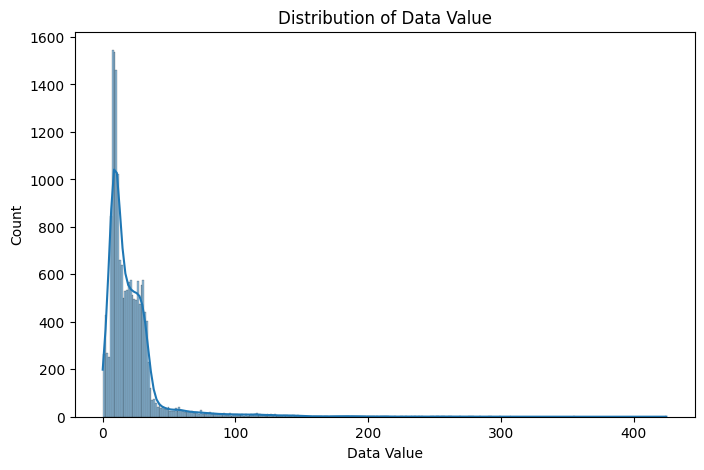

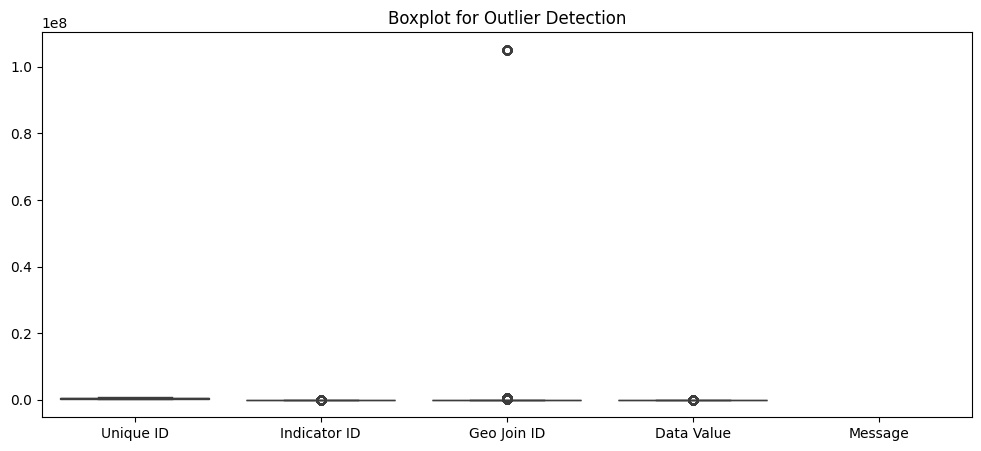

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

# Load Dataset
data = pd.read_csv("/content/drive/MyDrive/AI /Air_Quality.csv")

# Exploratory Data Analysis (EDA)
print("Dataset Head:\n", data.head())
print("\nDataset Info:")
data.info()
print("\nStatistical Summary:\n", data.describe())

# Handle missing values
missing_values = data.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)

# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data["Data Value"], kde=True)
plt.title("Distribution of Data Value")
plt.show()


# Boxplot for detecting outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Data Preprocessing
data.dropna(inplace=True)
X = data.drop(["Data Value", "Message", "Geo Place Name", "Start_Date", "Time Period"], axis=1, errors='ignore')
y = data["Data Value"]

# Encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)